In [2]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix

In [4]:
folder_path = "D:/Projects/News Article classifier/01 Dataset Creation/Pickles//"

filename = "features_test.pickle"
with open(folder_path + filename, "rb") as file:
    features_test = pickle.load(file)
    
filename = "features_train.pickle"
with open(folder_path + filename, "rb") as file:
    features_train = pickle.load(file)
    
filename = "labels_test.pickle"
with open(folder_path + filename, "rb") as file:
    labels_test = pickle.load(file)

filename = "labels_train.pickle"
with open(folder_path + filename, "rb") as file:
    labels_train = pickle.load(file)
    
filename = "data.pickle"
with open(folder_path + filename, "rb") as file:
    data = pickle.load(file)

In [5]:
knn1 = KNeighborsClassifier()
knn1.fit(features_train, labels_train)
y_pred = knn1.predict(features_test)
accuracy_score(y_pred, labels_test)

0.9066427289048474

In [6]:
print("Parameters currtently in use:")
pprint(knn1.get_params())

Parameters currtently in use:
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


### Grid Search CV

In [10]:
n_neighbors = [int(x) for x in np.linspace(start = 5, stop = 501, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1,
                          n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.5s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                         55, 60, 65, 70, 75, 80, 85, 90, 95,
                                         100, 105, 110, 115, 120, 125, 130, 135,
                                         140, 145, 150, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [11]:
grid_search.best_params_

{'n_neighbors': 65}

Exhaustive search centered at n_neighbors = 65

In [12]:
n_neighbors = [int(x) for x in np.linspace(start = 60, stop = 71, num = 11)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1,
                          n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.4s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
                                         71]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [13]:
grid_search.best_params_

{'n_neighbors': 69}

In [14]:
grid_search.best_score_

0.9346642468239565

## Best Model performance

In [15]:
best_knn = grid_search.best_estimator_
best_knn.fit(features_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=69, p=2,
                     weights='uniform')

In [16]:
ypred = best_knn.predict(features_test)
accuracy_score(ypred, labels_test)

0.9102333931777379

### Training Accuracy

In [17]:
print("Training Accuracy : ", (accuracy_score(best_knn.predict(features_train), labels_train)))

Training Accuracy :  0.9286998202516477


### Test Accuracy

In [18]:
ypred = best_knn.predict(features_test)
print("Test Accuracy : ", (accuracy_score(ypred, labels_test)))

Test Accuracy :  0.9102333931777379


### Classification Report

In [19]:
print(classification_report(ypred, labels_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       115
           1       0.89      0.88      0.88       108
           2       0.91      0.90      0.90       100
           3       0.94      0.95      0.95       137
           4       0.89      0.89      0.89        97

    accuracy                           0.91       557
   macro avg       0.91      0.91      0.91       557
weighted avg       0.91      0.91      0.91       557



### Confusion Matrix

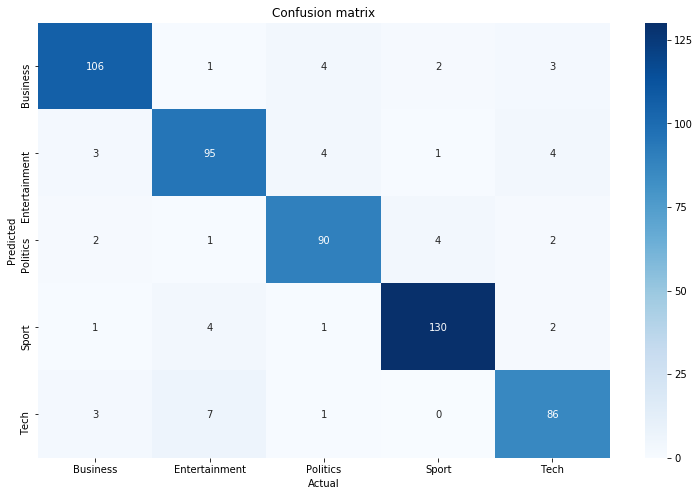

In [21]:
aux_df = data[['Category', 'Category_codes']].drop_duplicates().sort_values('Category_codes')
conf_matrix = confusion_matrix(labels_test, ypred)

plt.figure(figsize=(12.8,8))
ax = sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues", fmt = "g")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


We will create a dataframe with Model Name, Training Accuracy and Test Accuracy to compare later

In [23]:
models_summary = pd.DataFrame({"Model Name:" : ["KNN"],
     "Training Accuracy" : [accuracy_score(labels_train, best_knn.predict(features_train))],
     "Test Accuracy" : [accuracy_score(labels_test, ypred)]}, index = [3])

In [24]:
models_summary

,Model Name:,Training Accuracy,Test Accuracy
3,KNN,0.9287,0.910233


In [26]:
with open("Models//models_summary.pickle", "rb") as file:
    all_models_summary = pickle.load(file)
all_models_summary = all_models_summary.append(models_summary)
all_models_summary

,Model Name:,Training Accuracy,Test Accuracy
0,Random Forest Classifier,1.0000,0.960503
1,Gradient Boosting Classifier,1.0000,0.958707
2,Support Vector Machine,1.0000,0.944345
3,KNN,0.9287,0.910233


In [27]:
with open("Models//best_knn.pickle", "wb") as output:
    pickle.dump(best_knn, output)
    
with open("Models//models_summary.pickle", "wb") as output:
    pickle.dump(all_models_summary, output)